## Merge Sort

Merge Sort is a divide-and-conquer algorithm 

## Implementation

In [1]:
import numpy as np

# General merge sort algorithm, recursively calls itself until the base case is reached.
def mergeSort(array):
  
  n = len(array)
  # base case of only one element in the array:
  if n <= 1:
    return array

  # setting the midpoint:
  if n%2 == 0:
      mid = int(n/2)
  else:
      mid = int(n/2)+1

  # splitting the array down the middle and recursively sorting the halves:
  left = mergeSort(array[0:mid])
  right = mergeSort(array[mid:n])

  # merging and returning the sorted halves of the array:
  return merge(left, right)

# Helper function for merging two already sorted halves of the array:
def merge(left, right):

  # initializing the resulting sorted array and the indices of interest:
  result = []
  i = 0
  j = 0

  # looping through the elements of both arrays to compare and place in sorted array:
  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      result.append(left[i])
      i += 1
    else:
      result.append(right[j])
      j += 1
   
  # the remaining elements can be assumed to be greater than all the elements already placed in the array, and will only come from one half of the array.

  # looping through the remaining elements to clean up and add to sorted array:
  while i < len(left):
    result.append(left[i])
    i += 1
  while j < len(right):
    result.append(right[j])
    j += 1

  # resulting array is fully sorted.
  return result

In [2]:
# Generating three test case arrays of length 10, 20, and 40, respectively. Each array has elements in the range of [1, 9].
ex1 = list(np.random.randint(1, 10, size=10))
ex2 = list(np.random.randint(1, 10, size=20))
ex3 = list(np.random.randint(1, 10, size=40))

# Printing the generated unsorted array and resulting sorted array for each generated array from above.
print(f"Unsorted: {ex1}")
print(f"Sorted: {mergeSort(ex1)}\n")
print(f"Unsorted: {ex2}")
print(f"Sorted: {mergeSort(ex2)}\n")
print(f"Unsorted: {ex3}")
print(f"Sorted: {mergeSort(ex3)}\n")

Unsorted: [2, 7, 6, 3, 3, 7, 3, 8, 8, 9]
Sorted: [2, 3, 3, 3, 6, 7, 7, 8, 8, 9]

Unsorted: [7, 2, 1, 8, 3, 4, 8, 2, 8, 6, 6, 7, 5, 2, 5, 3, 3, 9, 1, 2]
Sorted: [1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9]

Unsorted: [3, 8, 7, 1, 2, 4, 5, 9, 4, 4, 6, 9, 8, 2, 1, 4, 9, 6, 4, 7, 1, 1, 5, 4, 8, 8, 7, 4, 7, 5, 8, 6, 1, 1, 1, 2, 4, 6, 4, 7]
Sorted: [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9]



## Experimental Analysis
- Measure the running time of the algorithm on different input sizes and compare it
to its theoretical time complexity.
- Measure the peak memory usage of the algorithm and analyze how memory requirements scale with input size.
- Prepare visualizations, such as graphs or tables, to illustrate your experimental results.

In [35]:
import time
import matplotlib.pyplot as plt
import tracemalloc

# Measures the peak memory allocation and run time for the given input size:
def analysis(input_size):

    # Generating the test case with the given input size
    ex = np.random.randint(1, 100, int(input_size))

    # Setting a timer
    start_time = time.time()

    # Tracking memory allocation
    tracemalloc.start()

    # Calling the algorithm with the test case
    mergeSort(ex)

    # Extracting insights from memory allocation tracker
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Return the peak memory allocation and run time of test case
    return peak / 10**3, time.time()-start_time  # return in MB

# Initiate arrays for storing run times and memory usage, as well as input sizes for analysis
times = []
memory_usages = []
input_sizes = np.logspace(0, 6, 20)

# Looping through input sizes to measure each one
for input_size in input_sizes:
  mem, time_elapsed = peak_memory(input_size)
  times.append(time_elapsed)
  memory_usages.append(mem)

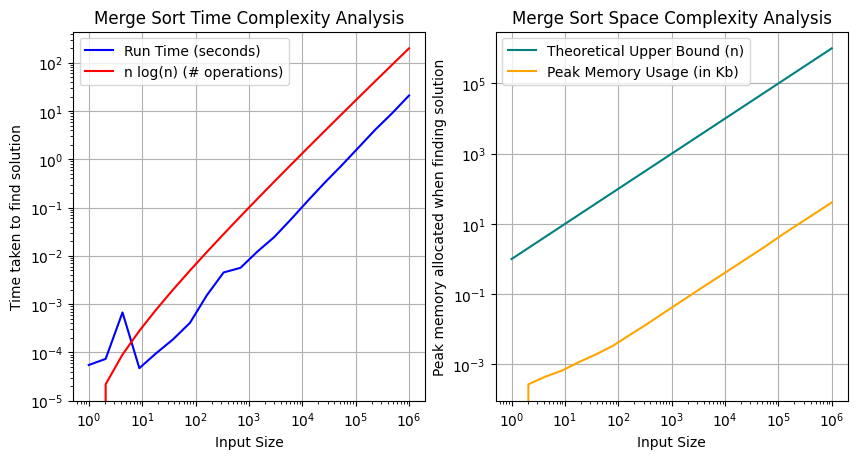

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

# Plotting running time against theoretical upper bound
ax1.loglog(input_sizes, times, 'b-', label='Run Time (seconds)')
nlogn = np.log2(input_sizes) * input_sizes * 10**-5
ax1.loglog(input_sizes, nlogn, label='n log(n) (# operations)', color='red')

# Plotting memory usage against thoeretical upper bound
ax2.loglog(input_sizes, input_sizes, color='teal', label='Theoretical Upper Bound (n)')
ax2.loglog(input_sizes, memory_usages, label='Peak Memory Usage (in Kb)', color='orange')

# Add labels and title for first plot
ax1.set_xlabel("Input Size")
ax1.set_ylabel("Time taken to find solution")
ax1.set_title("Merge Sort Time Complexity Analysis")
ax1.grid(True)
ax1.legend()

# Add labels and title for second plot
ax2.set_xlabel("Input Size")
ax2.set_ylabel("Peak memory allocated when finding solution")
ax2.set_title("Merge Sort Space Complexity Analysis")
ax2.grid(True)
ax2.legend()

## Key Takeaways



## Deliverables
- Source Code: A well-documented implementation of the algorithm, including a
README file describing how to run the code and reproduce results.
2
- Report: A 2–3 page report summarizing the algorithm, its implementation, experi-
mental analysis, and key takeaways.
- Presentation Slides: A professional slide deck to accompany your presentation.
This project is an opportunity for you to apply theoretical knowledge, practice your
coding skills, and analyze the performance of algorithms in real-world scenarios. It’s your
chance to dive into the fascinating world of algorithms and showcase your creativity and
problem-solving skills. We look forward to seeing your innovations!